# Outline

### [Exploratory Data Analysis:](#week-1-exploratory-data-analysis)

1. [Merge both the datasets.](#1-merge-both-the-datasets)
2. [Plot the merged dataset as a hierarchically-clustered heatmap.](#2-plot-the-merged-dataset-as-a-hierarchically-clustered-heatmap)
3. [Perform Null-hypothesis testing.](#3-perform-null-hypothesis-testing)

### [Dimensionality Reduction:](#week-2-dimensionality-reduction)

Each sample has expression values for around 20K genes. However, it may not be necessary to include all 20K genes expression values to analyze each cancer type. Therefore, we will identify a smaller set of attributes which will then be used to fit multiclass classification models. So, the first task targets the dimensionality reduction using various techniques such as,

1. [PCA](#1-pca)
2. [LDA](#2-lda)
3. [t-SNE](#3-t-sne)

### [Clustering Genes and Samples:](#week-3-clustering-genes--samples)

Our next goal is to identify groups of genes that behave similarly across samples and identify the distribution of samples corresponding to each cancer type. Therefore, this task focuses on applying various clustering techniques, e.g., k-means, hierarchical, and mean-shift clustering, on genes and samples.

1. First, apply the given clustering technique on all genes to identify:
    1. Genes whose expression values are similar across all samples
    2. Genes whose expression values are similar across samples of each cancer type 
2. Next, apply the given clustering technique on all samples to identify:
    1. Samples of the same class (cancer type) which also correspond to the same cluster
    2. Samples identified to be belonging to another cluster but also to the same class (cancer type)

### Building Classification Model(s) with Feature Selection:

Our final task is to build a robust classification model(s) for identifying each type of cancer.

1. Build a classification model(s) using multiclass SVM, Random Forest, and Deep Neural Network to classify the input data into five cancer types
2. Apply the feature selection algorithms, forward selection, and backward elimination to refine selected attributes (selected in Task-2) using the classification model from the previous step
3. Validate the genes selected from the last step using statistical significance testing (t-test for one vs. all and F-test)

In [12]:
# Load needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
plt.style.use('ggplot')

In [13]:
# Create folders for plots & model objects
dirs = ['images', 'model_objects'
]

for dir in dirs:
    if not os.path.exists(dir):
        os.makedirs(dir)

In [3]:
# Load Data
features = pd.read_csv('datasets/data.csv')
labels = pd.read_csv('datasets/labels.csv')

# Week 1: Exploratory Data Analysis

### 1. Merge Both the Datasets

In [4]:
df = pd.merge(features, labels)

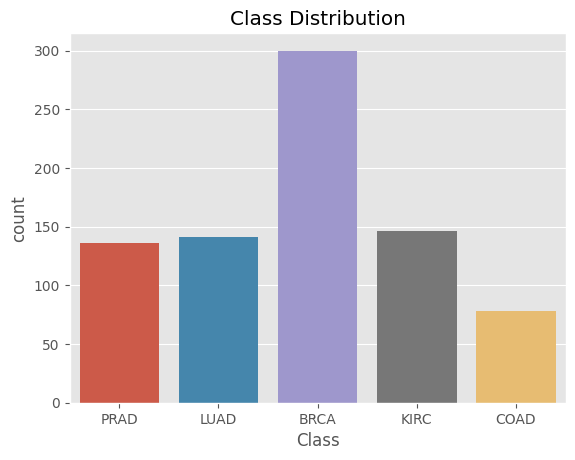

In [14]:
# Plot a countplot for the classes in the data
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
# save the plot to disk
plt.savefig(f'./images/class_countplot.png')
plt.show()


### 2. Plot the Merged Dataset as a Hierarchically-Clustered Heatmap.

In [10]:
# Pivot the data for one row for each class and one column for each feature
df_pivot = df.pivot_table(index='Class')
df_pivot

/var/folders/r7/dtjny68152z02rjhb55rxv300000gn/T/ipykernel_6365/2647018209.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df_pivot = df.pivot_table(index='Class')


,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,gene_10004,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.011362,2.839739,0.544066,10.681488,10.303568,3.258028,7.339461,7.900497,7.489146,7.508378,...,1.969278,5.142237,1.736160,2.312551,1.696127,2.493789,0.046527,2.099709,0.151063,6.954733
COAD,0.022212,3.438381,0.357278,11.015745,9.951124,3.462039,5.526673,7.487396,3.783493,6.959238,...,2.216178,0.354828,1.833606,1.619692,3.839205,2.396207,0.090327,2.298246,0.065007,6.618466
KIRC,0.046544,2.398129,1.166824,10.238999,11.148094,1.651798,6.895752,7.686932,7.269611,7.636246,...,1.824964,0.596508,2.393303,1.872888,1.289448,3.139623,0.130416,2.387948,0.148641,6.429343
LUAD,0.041088,3.358260,0.607541,10.517670,10.503698,3.754181,7.281878,7.041924,6.145042,7.148682,...,2.609490,2.801700,2.738326,1.869805,2.217144,2.459608,0.042070,2.281828,0.056608,6.721517
PRAD,0.026544,3.441041,0.765608,10.282936,9.967433,1.949878,7.946141,8.529695,5.696368,7.396572,...,1.623491,4.594215,1.684084,2.588050,1.703772,3.568490,0.572893,3.621548,0.094953,7.104225


/usr/local/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2000x1000 with 0 Axes>

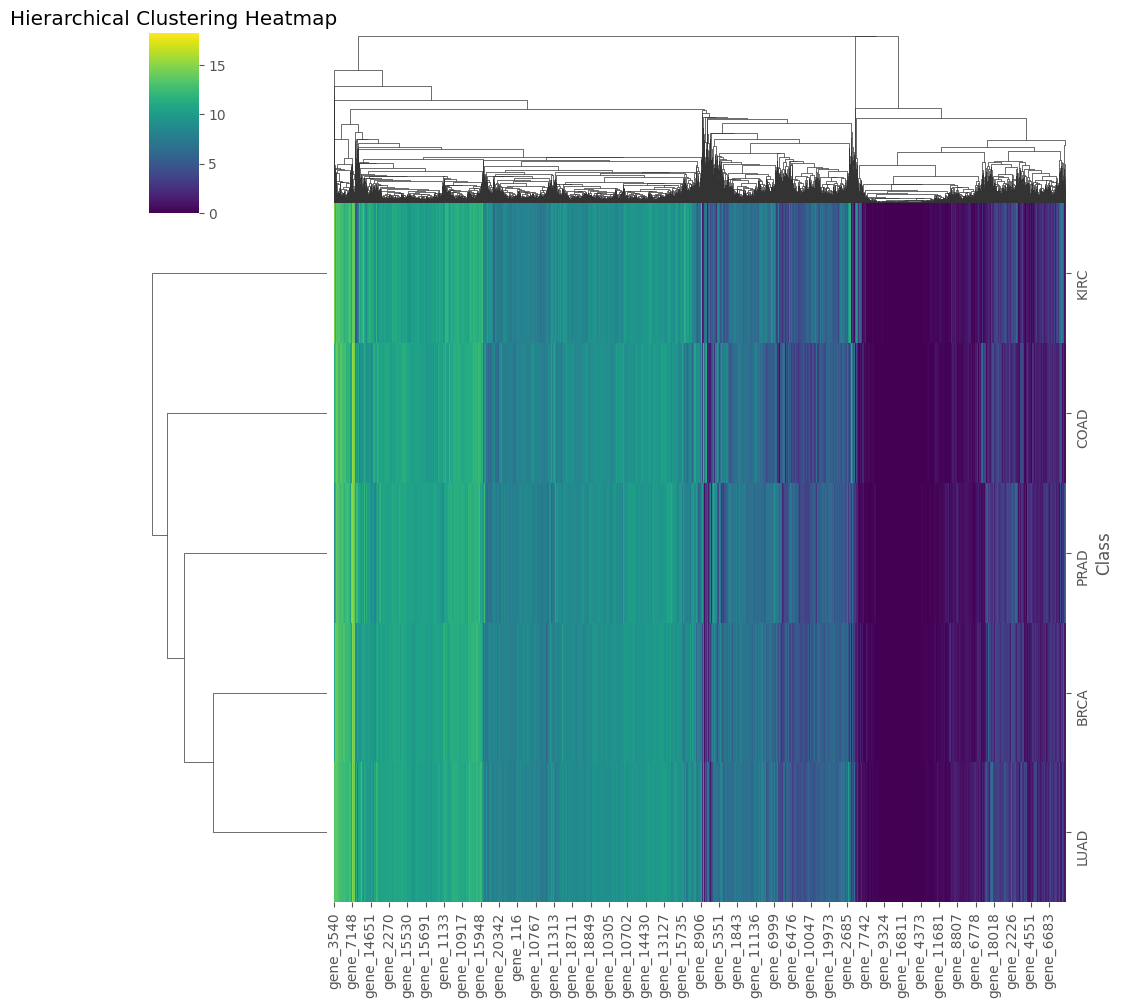

In [15]:
# Plot the data as a hierarchical clusetered heatmap
# increase the plot size
plt.figure(figsize=(20, 10))
sns.clustermap(df_pivot, cmap='viridis')
plt.title('Hierarchical Clustering Heatmap')
# save the plot to disk
plt.savefig(f'./images/hierarchical_clustermap.png')
plt.show()

### 3. Perform Null-hypothesis Testing

Ho: No statistically significant diference in gene level between cancer types

Ha: Statistically significant diference in gene level between cancer types

In [16]:
# Print the unique class names
print(df['Class'].unique())

['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']


In [20]:
# Get a list of the gene columns
gene_columns = [col for col in df.columns if col.startswith('gene')]

# Separate the data into separate dataframes for each class
df_PRAD = df[df['Class'] == 'PRAD'][gene_columns]
df_LUAD = df[df['Class'] == 'LUAD'][gene_columns]
df_BRCA = df[df['Class'] == 'BRCA'][gene_columns]
df_KIRC = df[df['Class'] == 'KIRC'][gene_columns]
df_COAD = df[df['Class'] == 'COAD'][gene_columns]

In [21]:
df_BRCA

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.000000,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
8,0.0,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.0,4.067604,...,6.721974,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.000000
10,0.0,3.492071,3.553373,7.151707,10.253446,0.0,8.301258,0.000000,0.0,0.000000,...,6.231006,9.061674,10.042261,6.580103,9.785004,12.383834,9.869359,8.991768,5.735121,0.892818
13,0.0,1.551048,3.529846,6.326825,10.633849,0.0,8.944659,0.000000,0.0,0.000000,...,3.920732,7.846901,9.379835,7.195800,8.907645,12.079481,9.218936,8.104101,3.660894,0.000000
14,0.0,1.964842,2.183010,6.596832,10.248141,0.0,7.087251,0.441483,0.0,0.000000,...,6.078847,10.829588,10.404567,6.588536,8.952596,10.461725,10.582857,9.488141,3.261967,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,0.0,2.301734,1.814550,7.013462,9.750047,0.0,7.808366,0.642193,0.0,0.000000,...,5.820404,8.911440,9.694020,5.017873,9.802623,11.196055,9.989281,10.000380,4.442658,0.000000
791,0.0,3.080061,2.815739,6.209617,9.644469,0.0,6.351980,0.000000,0.0,0.000000,...,6.346672,9.583735,10.205378,6.183600,10.040961,11.035335,11.030377,10.119304,7.313500,0.000000
792,0.0,4.337404,2.597126,6.070379,9.863990,0.0,7.095112,1.269512,0.0,0.000000,...,6.664653,9.536869,9.962751,5.686727,10.198568,10.864960,9.617853,12.813320,3.805261,0.000000
793,0.0,2.068224,0.857663,6.218739,10.623068,0.0,6.634082,0.789354,0.0,0.000000,...,5.941379,9.217519,9.862761,4.997929,9.926775,10.703722,9.144204,9.682057,5.384968,0.789354


### A/B Testing Statistical Tests

##### T-Test --> Test of means of 2 groups (parametric)
##### ANOVA Test --> Test of means if the distributions are normal (parametric)
##### Kruskal-Wallis Test --> Test of means if the distribution is not normal (non-parametric)

In [24]:
# Import package to perform Kruskal-Wallis & ANOVA test
from scipy.stats import kruskal
from scipy.stats import f_oneway

In [30]:
# Perform Kruskal-Wallis test on each gene column
p_values = []
sig_value = 0.05
for col in gene_columns:
    try:
        _, p_value = kruskal(df_PRAD[col], df_LUAD[col], df_BRCA[col], df_KIRC[col], df_COAD[col])
        p_values.append(p_value)
    except:
        p_values.append(np.nan)

# Create a dataframe with the p-values
df_p_values = pd.DataFrame({'p_values': p_values}, index=gene_columns)
df_p_values['significant'] = df_p_values['p_values'] < sig_value
df_p_values

,p_values,significant
gene_0,2.373255e-02,True
gene_1,1.391192e-18,True
gene_2,2.970115e-40,True
gene_3,3.289400e-46,True
gene_4,9.102232e-26,True
...,...,...
gene_20526,1.549550e-19,True
gene_20527,3.940645e-04,True
gene_20528,2.780220e-20,True
gene_20529,3.365632e-24,True


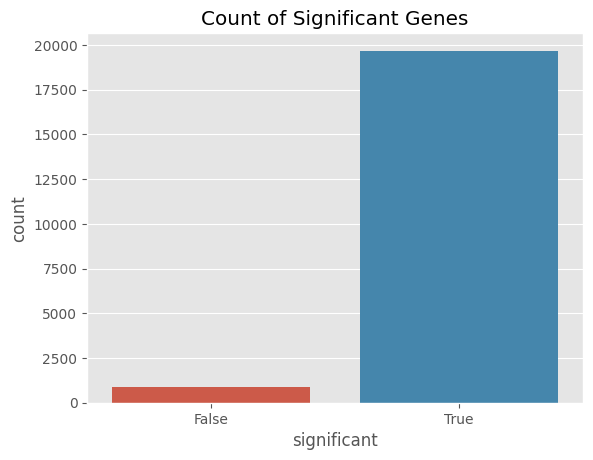

In [31]:
# Plot the count of significant genes
sns.countplot(x='significant', data=df_p_values)
plt.title('Count of Significant Genes')
# save the plot to disk
plt.savefig(f'./images/significant_genes_countplot.png')
plt.show()

# Week 2: Dimensionality Reduction

### 1. PCA

In [34]:
# Load modules for PCA, LDAs, and t-SNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

In [35]:
# Create standard scaler object to normalize the data
scaler = StandardScaler()

# Fit the scaler to the data
df_sc = scaler.fit_transform(df[gene_columns])

In [37]:
# Perform PCA
pca = PCA(n_components=0.95, random_state=42)
pca_result = pca.fit_transform(df[gene_columns].values)

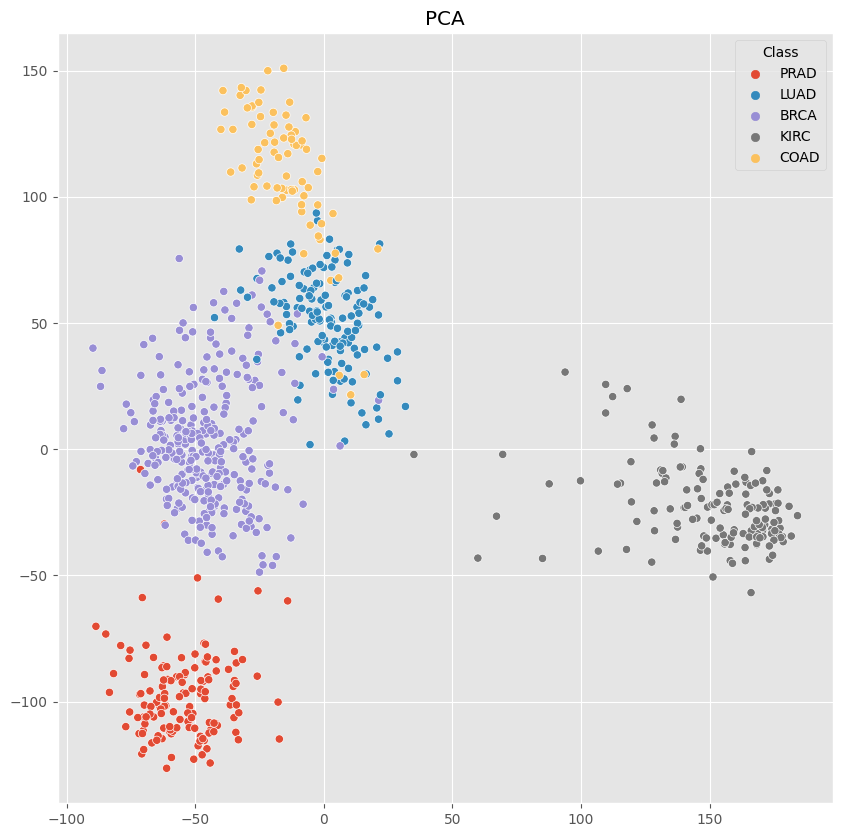

In [44]:
# Plot the PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Class'])
plt.title('PCA')
# save the plot to disk
plt.savefig(f'./images/pca_scatter.png')
plt.show()

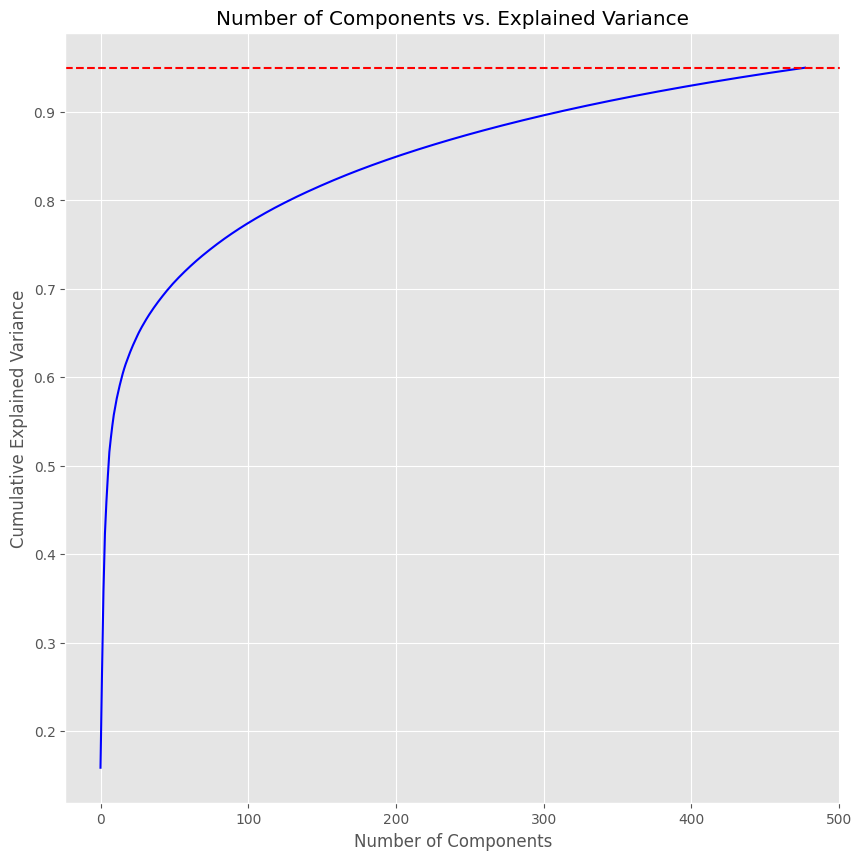

In [45]:
# Plot Number of Components vs. Explained Variance
plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='b', linestyle='-')

# Add horizonatl line at 95% explained variance
plt.axhline(y=0.95, color='r', linestyle='--')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Number of Components vs. Explained Variance')
# save the plot to disk
plt.savefig(f'./images/pca_explained_variance.png')
plt.show()

### 2. LDA

In [57]:
# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=3)
lda_result = lda.fit_transform(df_sc, df['Class'])

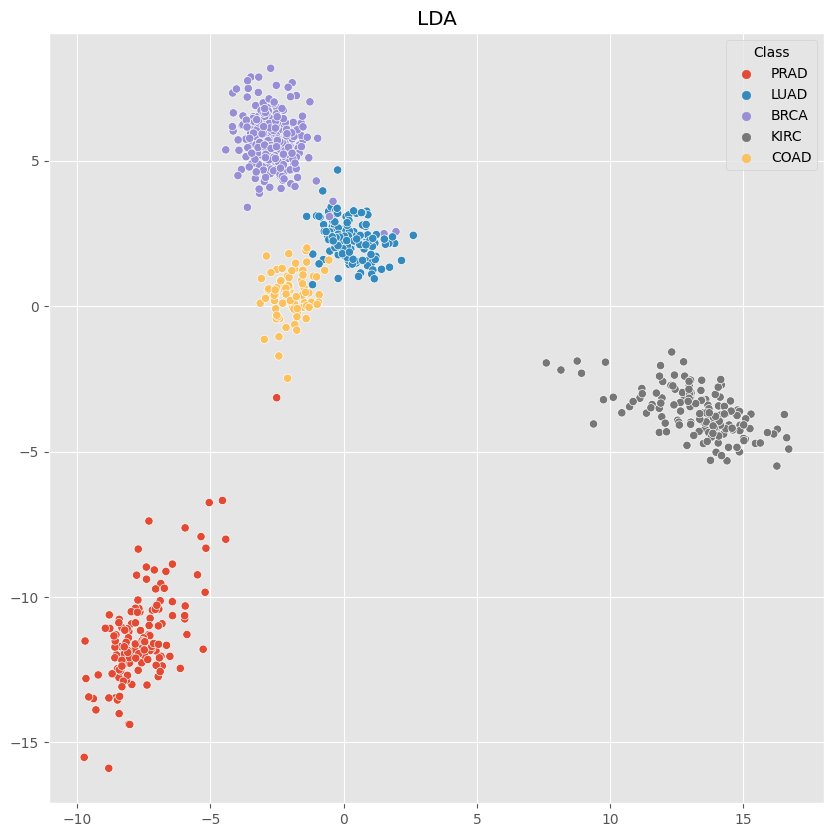

In [62]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=lda_result[:, 0], y=lda_result[:, 1], hue=df['Class'])
plt.title('LDA')
# save the plot to disk
plt.savefig(f'./images/lda_scatter.png')
plt.show()

### 3. t-SNE

In [63]:
# Perform t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_sc)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 801 samples in 0.393s...
[t-SNE] Computed neighbors for 801 samples in 0.922s...
[t-SNE] Computed conditional probabilities for sample 801 / 801
[t-SNE] Mean sigma: 43.699032
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.866867
[t-SNE] KL divergence after 300 iterations: 0.836240


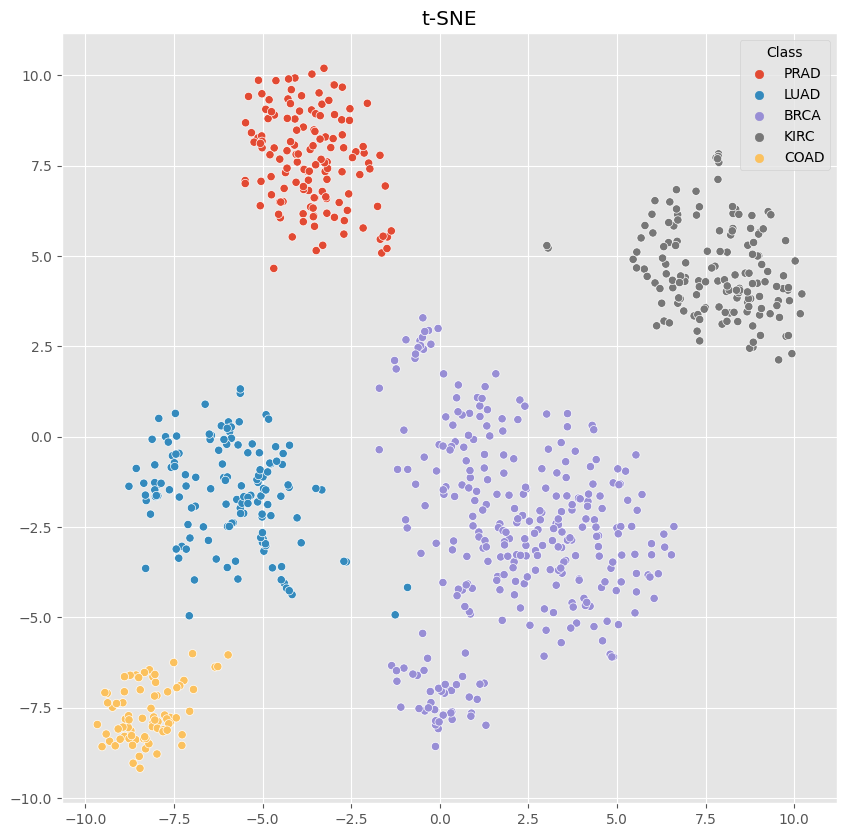

In [65]:
# Plot the t-SNE results
plt.figure(figsize=(10, 10))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['Class'])
plt.title('t-SNE')
# save the plot to disk
plt.savefig(f'./images/tsne_scatter.png')
plt.show()

# Week 3: Clustering Genes & Samples

### 1. K-Means

In [66]:
# Load modules for K-Means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [67]:
# Use silhouette score to determine the optimal number of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_sc)
    silhouette_scores.append(silhouette_score(df_sc, kmeans.labels_))

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

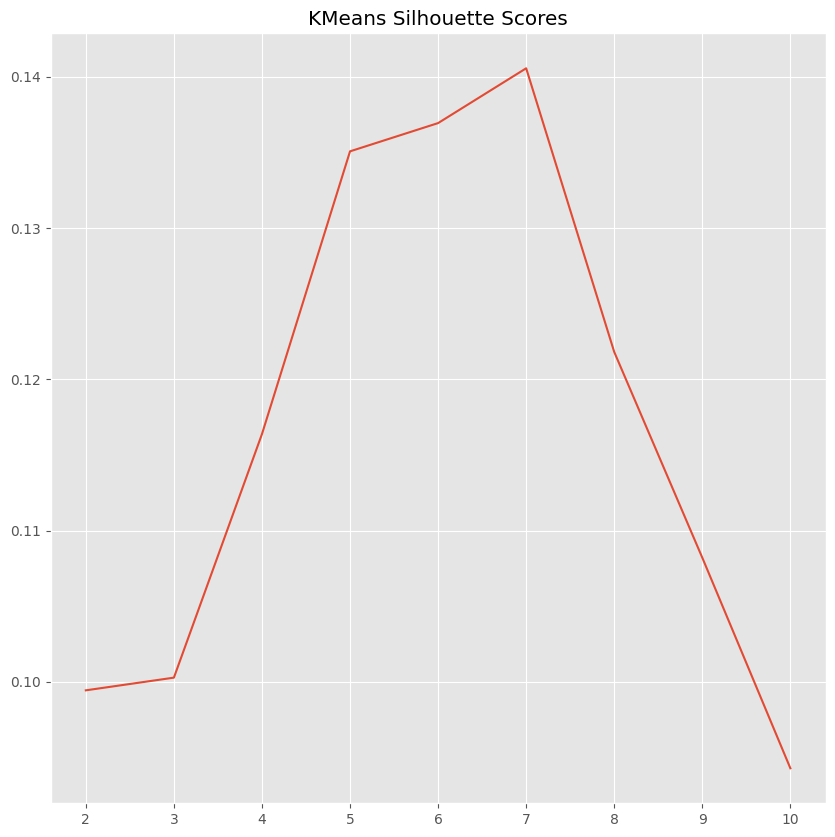

In [69]:
# Plot the silhouette scores
plt.figure(figsize=(10, 10))
sns.lineplot(x=range(2, 11), y=silhouette_scores)
plt.title('KMeans Silhouette Scores')
# save the plot to disk
plt.savefig(f'./images/kmeans_silhouette_scores.png')
plt.show()

In [73]:
# Perform K-Means clustering with the optimal number of clusters
optimal_clusters = np.argmax(silhouette_scores) + 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
k_means_clusters = kmeans.fit_predict(df_sc)


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [72]:
# Plot the K-Means results
plt.figure(figsize=(10, 10))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=k_means_clusters)
plt.title('K-Means Clustering')
# save the plot to disk
# plt.savefig(f'./images/kmeans_scatter.png')
plt.show()

NameError: name 'k_means_clusters' is not defined

<Figure size 1000x1000 with 0 Axes>

##### [Back to Top](#outline)